# Project 3
## Overview:
- Part I- **Reinforcement Learning and Deep Q Learning**
- Part II- **Recurrent Neural Network (RNN) and Long short-term memory (LSTM)**
- Part III- **Search Algorithms**

In [2]:
from IPython.display import Image
from google.colab import drive
drive.mount('/content/drive')
d = '/content/drive/MyDrive/project3_BehradBinaei_810101392/project3/'

Mounted at /content/drive


## Part I- **Reinforcement Learning and Deep Q Learning**

In Reinforcement learning we have to kinds of algorithms that are Model-Based RL and Model-Free RL. The algorithm of model-based RL is based on Markov Decision Process. It means there exsits a deterministic probability of reaching a state $ s ^ {'}$ if action "a" is taken in state $s$

**Markove Decision Process** : $$P(s^{'}, s, a)$$

**Note** : Markov properly states that the effect of an action taken in a state depend only on that state and not on the prior history

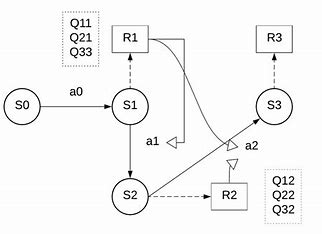

In [ ]:
Image(filename=d+'images/statediagram.png', width=300, height=400)

In Markov decision process we have two functions that determines for agent to which action should be chosen.
- **Policy Function**
- **Value Fuunction**


The goal is to find the optimal policy that maximizes the return by interacting with the enviroment.

### Value Iteration and Policy Iteration

### Policy

Policy is a strategy that an agent uses in pursuit of goals. The policy dictate the actions that the agent takes as a function of the agent's state in order to maximizee the future reward. In other words, policy determines the agent's behaviour from a specific state..
$$policy : \pi (s, a) = Pr(a=a|s=s)$$

### Value Function

For every policy $\pi$, there is a value associated with being in each of the given states "s". The state- value function gives the **expected reward**, if we start from state, s and act according to the policy.

$$V_{\pi}(s) = E(\sum_{t}\gamma^t r_t|s_0=s)$$

- where $\gamma$ is the discount factor $( 0 <= \gamma < 1 )$.

$$V_{\pi}(s) = \max_{\pi} E(\sum_{t=0}\gamma^t r_t|s_0=s)$$


$$V_{\pi}(s) = \max_{\pi} E(r_0 + \sum_{t=1}\gamma^t r_t|s_1=s)$$


And finally e reach to bellman's equation.
$$V_{\pi}(s) = \max_{\pi} E(r_0 + \gamma V(s'))$$

Bellman’s equation is a fundamental concept in dynamic programming and control theory. It provides a recursive strategy to solve optimization problems by breaking them down into simpler subproblems. This equation is simple but really powerful basis of dynamic programing



### Value Iteration

The value iteration algorithm updates the value function based on the Bellman optimality equation until convergence:
$$ V_{k+1}(s) = \max_a \left[ R(s,a) + \gamma \sum_{s'} P(s'|s,a) V_k(s') \right] $$

This equation is exactly same as the bellman's equation $V_{\pi}(s) = \max_{\pi} E(r_0 + \gamma V(s'))$
- The sum is needed because it is markov decision process



### Policy Iteration

Policy iteration is two step iteration process

- 1. Find the best value function for our current policy using value iteration.
$$ V_{\pi}(s) = E(R(s', s, \pi(s))+ \gamma V_{\pi}(s'))= \sum_{a} \pi(a|s) \sum_{s'} P(s'|s,a) \left[ R(s,a,s') + \gamma V_{\pi}(s') \right] $$

- 2. After Converge the value function, we sweep through the actions and we try to iteratively update the policy so that given a state "s",  we can take the best actions "a" that maximize our future rewards.

**Policy Improvement:**


$$ \pi'(s) = \arg\max_a \ E(R(s', s, \pi(s))+ \gamma V_{\pi}(s'))=\arg\max_a \sum_{s'} P(s'|s,a) \left[ R(s,a,s') + \gamma V_{\pi}(s') \right] $$


- 3. When the improving our policy gets done, we back to update our value function using new policy.


### Example for policy iteration

Source : https://medium.com/@pesupavish/policy-iteration-easy-example-d3fd1eb98c6c

In this example there are three states s(2, 2), s(2, 3), s(3, 2) and in each state we have four actions that are going up , down , right , left.

For a given action 𝝅(s) under the policy, the probability that action will be done is 0.70. and the other actions will have the probability at 0.10.
If an agent is at the goal s(3,2), the agent will stop with probability of 1.

Let’s a discount factor (𝛄) equals 0.9.

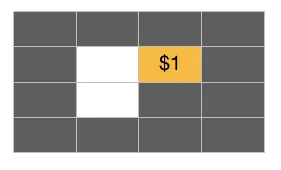

In [ ]:
Image(filename=d+'images/game_map.png', width=300, height=300)

#### Step1: Evaluate a given policy
Start with a simple policy 𝝅 : Always go right

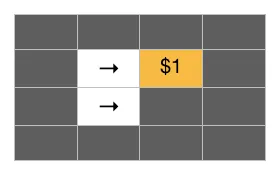

In [ ]:
Image(filename=d+'images/init_policy.png', width=300, height=300)

Probability of actions for the given policy

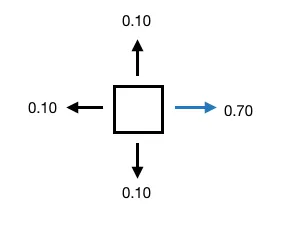

In [ ]:
Image(filename=d+'images/init_policy_dir.png', width=300, height=300)

Calculate value function for a simple policy 𝝅

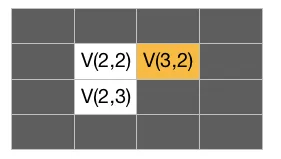

In [ ]:
Image(filename= d+r'images/value_func1.png', width=300, height=300)

- $$ V((3,2)) = 1(1+0.9V(3, 2)) $$

- $$ V((2,2)) = 0.7(1+0.9 V(3, 2)) + 0.1(0+ 0.9 V(2,3)) + 0.2 (0 + V(2,2)) $$

- $$ V(2, 3) = 0.1(0 + 0.9 V(2, 2) + 0.9(0 + 0.9 V(2, 3))$$


Now we have 3 variables and 3 equations so after solving these equation :

- V(3,2) = 10
- V(2,2) = 9
- V(2,3) = 4.265


#### Step2 : Improve Policy

When we reach the optimal value function now it's time to improve our policy using policy iteration.

The initial policy is always going right and if you are in the final state then stop. Now let's update it:

The formula of policy iteration:
$$ V_{\pi}(s) = E(R(s', s, \pi(s))+ \gamma V_{\pi}(s'))= \sum_{a} \pi(a|s) \sum_{s'} P(s'|s,a) \left[ R(s,a,s') + \gamma V_{\pi}(s') \right] $$


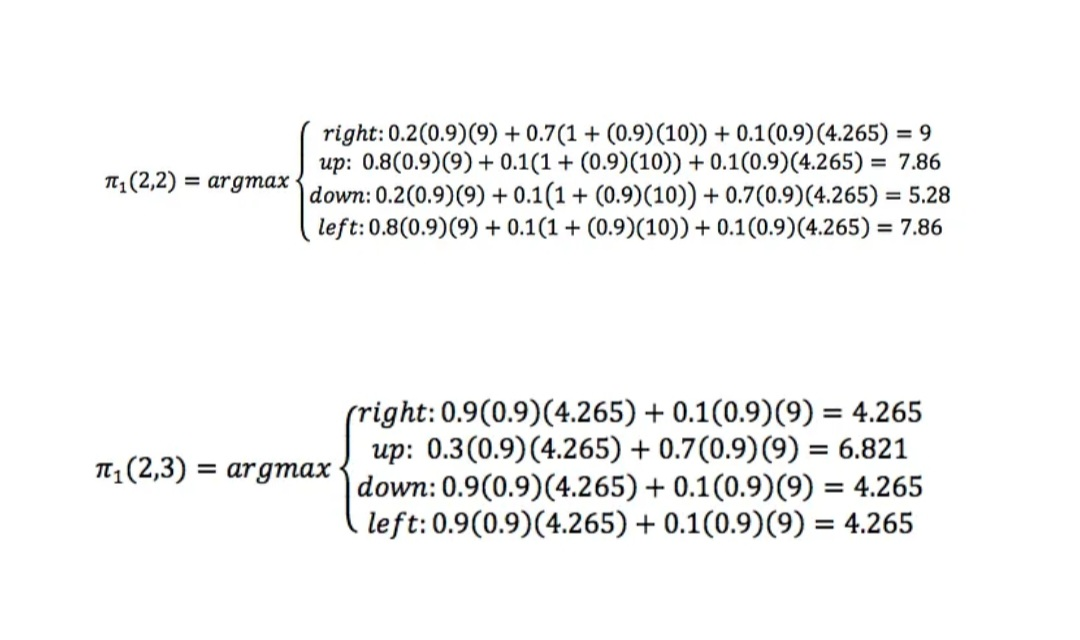

In [ ]:
Image(filename= d+r'images/policyIterationfinal.jpg', width=800, height=400)

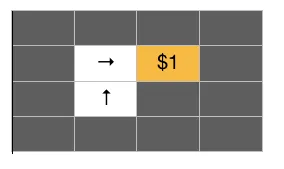

In [ ]:
Image(filename=d+r'images/final_policy.png', width=300, height=300)

### Explaination of the following codes and use hyperparameter optimization to improve the entire Deep Q Learning notebook.

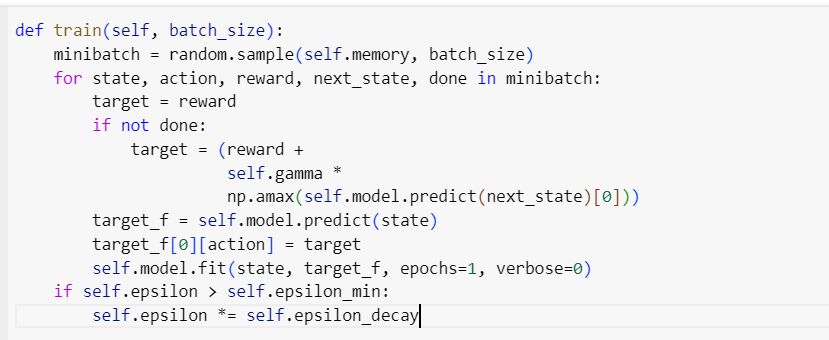

In [ ]:
Image(filename=d+r'images/B_code_1.png')

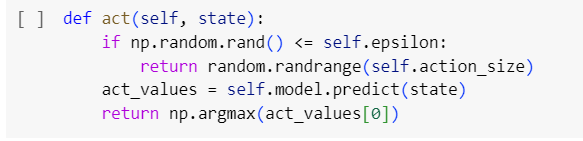

In [ ]:
Image(filename=d+r'images/B_code_2.png')

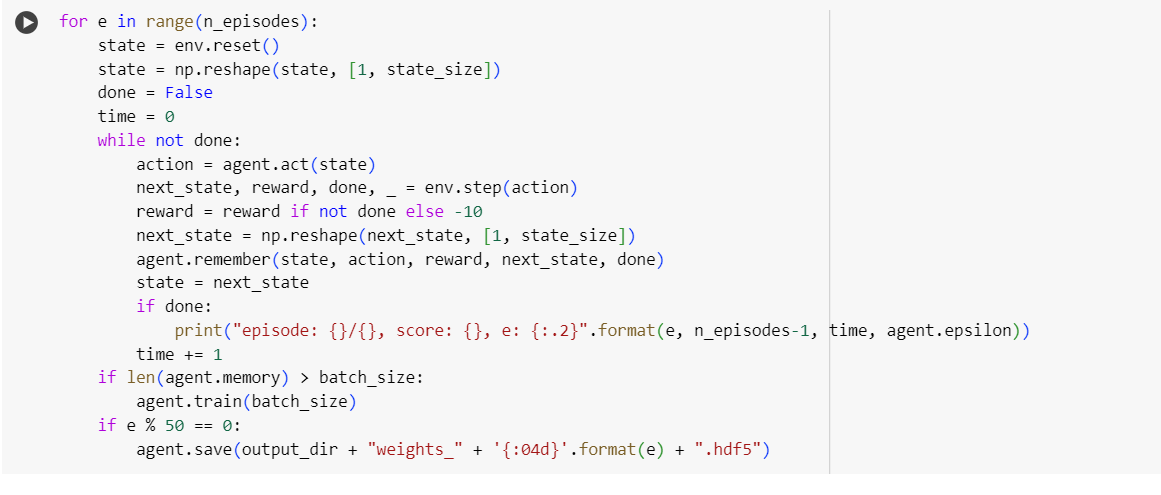

In [ ]:
Image(filename=d+r'images/B_code_3.png')

## Using Reinforcement Learning and Deep Q Learning to win FrozenLake game

In [ ]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

In [ ]:
environment = gym.make("FrozenLake-v1", is_slippery=False, render_mode="ansi", new_step_api=True)
environment.reset()
environment.render()

['\n\x1bS\x1bFFF\nFHFH\nFFFH\nHFFG\n']

In [ ]:
# Our table has the following dimensions:
# (rows x columns) = (states x actions) = (16 x 4)
qtable = np.zeros((16, 4))

nb_states = environment.observation_space.n  # = 16
nb_actions = environment.action_space.n      # = 4
qtable = np.zeros((nb_states, nb_actions))

print('Q-table =')
print(qtable)

Q-table =
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [ ]:
environment.step(2)
environment.render()

['  (Right)\nS\x1bF\x1bFF\nFHFH\nFFFH\nHFFG\n']

In [ ]:
action = environment.action_space.sample()

# 2. Implement this action and move the agent in the desired direction
neeeeeee ,reward, done, trancated, info = environment.step(action)

# Display the results (reward and map)
environment.render()
print(f'Reward = {reward}')

Reward = 0.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Training

In [ ]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({'font.size': 17})

# We re-initialize the Q-table
qtable = np.zeros((environment.observation_space.n, environment.action_space.n))


episodes = 1000        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor

for _ in range(episodes):
    state = environment.reset()
    done = False

    # By default, we consider our outcome to be a failure
    #state = state[0]
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state

        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, trancated,info = environment.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + \
                                alpha * (reward + gamma * np.max(qtable[new_state])- qtable[state, action])


        state = new_state

print()
print('===========================================')
print('Q-table after training:')
print(qtable)


Q-table after training:
[[0.        0.59049   0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.6561    0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.2278125 0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.729     0.       ]
 [0.        0.        0.81      0.       ]
 [0.        0.9       0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.        0.       ]
 [0.        0.        0.3375    0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.        0.       ]]


### Evaluation

In [ ]:
episodes = 100
nb_success = 0

for _ in range(100):
    state = environment.reset()
    done = False
    #state = state[0]
    # Until the agent gets stuck or reaches the goal, keep training it
    while not done:
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = environment.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, _,info = environment.step(action)

        # Update our current state
        state = new_state

        # When we get a reward, it means we solved the game
        nb_success += reward

# Let's check our success rate!
print (f"Success rate = {nb_success/episodes*100}%")

Success rate = 100.0%


### Visualizing the moves of agent

In [ ]:
state = environment.reset()
done = False
sequence = []

#state = state[0]
while not done:
    # Choose the action with the highest value in the current state
    if np.max(qtable[state]) > 0:
      action = np.argmax(qtable[state])

    # If there's no best action (only zeros), take a random one
    else:
      action = environment.action_space.sample()

    # Add the action to the sequence
    sequence.append(action)

    # Implement this action and move the agent in the desired direction
    new_state, reward, done, _,info = environment.step(action)

    # Update our current state
    state = new_state

    # Update the render
    clear_output(wait=True)
    print(environment.render())
    time.sleep(1)

print(f"Sequence = {sequence}")

['  (Right)\nSFFF\nFHFH\nFFFH\nHFF\x1bG\x1b\n']
Sequence = [1, 1, 2, 2, 1, 2]


## **Part II- Recurrent Neural Network (RNN) and Long short-term memory (LSTM)**

### Basic Anatomy of Recurrent Neural Network

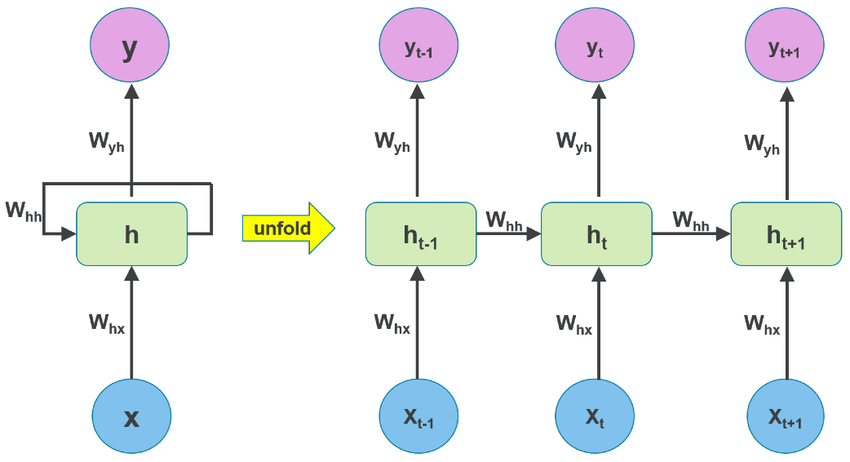

In [ ]:
Image(filename=d+'images/Structure-of-simple-recurrent-neural-network-RNN-and-unfolded-RNN.png', width=600, height=400)

### The Reason we update RNN

The concepts of vanishing and exploding gradients are critical issues in the training of neural networks, especially in the context of Recurrent Neural Networks (RNNs).


The term $ W_{rec} $ is the one that can lead to vanishing or exploding gradients. It involves the product of the derivatives of the hidden state with respect to previous hidden states, which are influenced by the weight $W_{rec}$. If $W{rec}$ has values less than 1, the product can vanish over time. If $W_{rec}$ has values greater than 1, the product can explode.

**Vanishing Gradients:**
This problem occurs when the gradients of the network's weights become very small during backpropagation. It's particularly problematic in deep networks or RNNs with long sequences because as the gradient is backpropagated through time, the repeated multiplication of small weights (less than 1) can make the gradient shrink exponentially. This leads to the earlier layers of the network learning very slowly, if at all, because their weight updates become negligible.

**Exploding Gradients:**
Conversely, exploding gradients happen when the gradients become excessively large. This can occur due to the multiplication of large weights (greater than 1) during backpropagation. The effect is that the weight updates can become so large that they cause the learning process to diverge, leading to an unstable network where the model weights can oscillate or become NaN (not a number).


![image.png](attachment:image.png)

**One the solutions is Long Short-Term Memory (LSTM)**

### What is Long Short-Term Memory (LSTM)?

A popular choice for complex tasks. LSTM networks introduce gates i.e., input gate, output gate and forget gate that control the flow of information within the network, allowing them to learn long-term dependencies more effectively than vanilla RNNs.

### Mathematical Explanation behind LSTM with example
Source : https://blog.mlreview.com/understanding-lstm-and-its-diagrams-37e2f46f1714

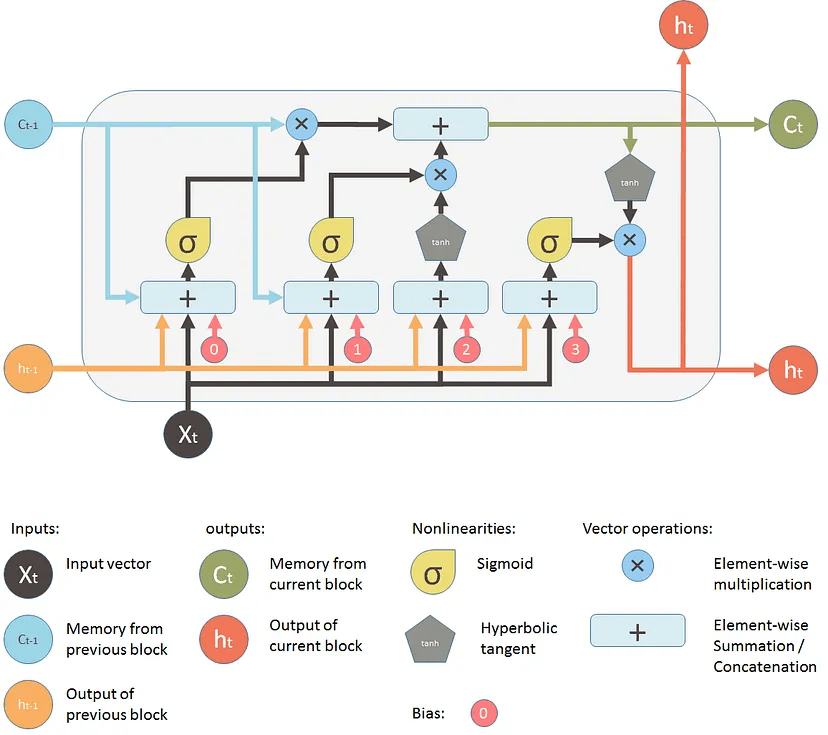

In [ ]:
Image(filename=d+'images\lstm_1_celldiagram.png', height=600, width=900)

The network takes three inputs. $X_t$ is the input of the current time step. $h_t-1$ is the output from the previous LSTM unit and $C_t-1$ is the “memory” of the previous unit. As for outputs, $h_t$ is the output of the current network. $C_t$ is the memory of the current unit.

Therefore, this single unit makes decision by considering the current input, previous output and previous memory. And it generates a new output and alters its memory.

#### Memory Updating

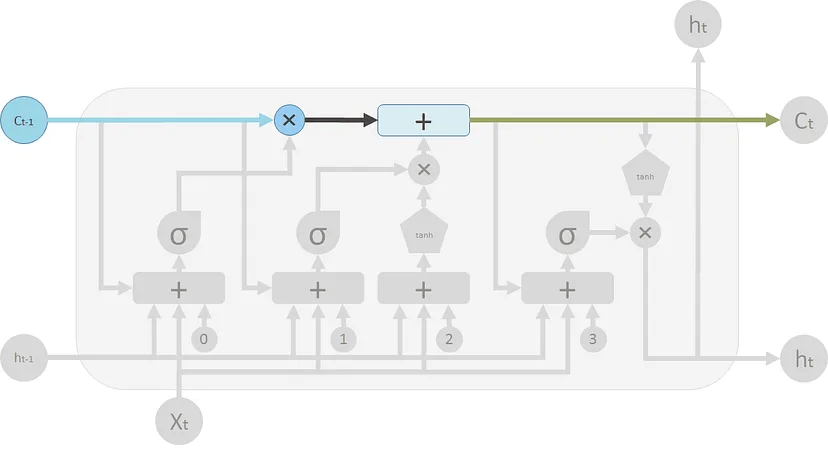

In [ ]:
Image(filename=d+'images/lstm_2_input.png', height=400, width=600)

On the LSTM diagram, The input is the old memory (a vector). The first cross ✖ it passes through is the forget valve. It is actually an element-wise multiplication operation. So if you multiply the old memory $C_{t-1}$ with a vector that is close to 0, that means you want to forget most of the old memory. You let the old memory goes through, if your forget valve equals 1.

Then the second operation the memory flow will go through is this + operator. This operator means piece-wise summation. New memory and the old memory will merge by this operation. How much new memory should be added to the old memory is controlled by another valve, the ✖ below the + sign.

After these two operations, you have the old memory $C_{t-1}$ changed to the new memory $C_t$.

##### Forget Gate (Forget Valve)

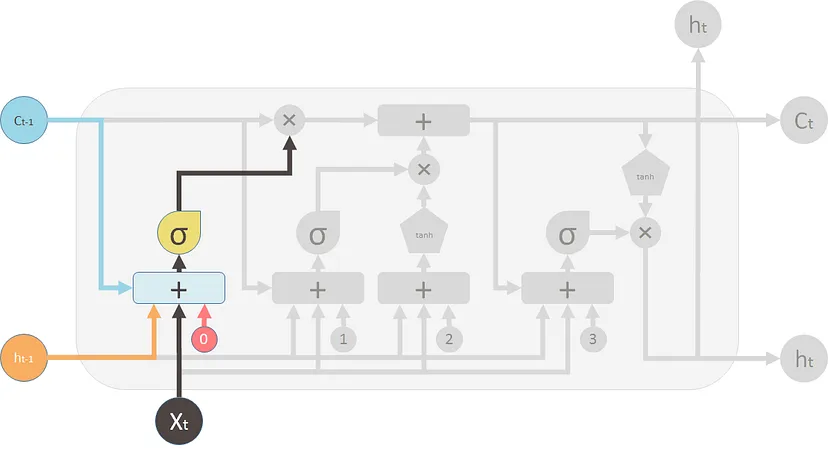

In [ ]:
Image(filename=d+'images/lstm_3.png', height=400, width=600)

Now lets look at the valves. The first one is called the forget valve. It is controlled by a simple one layer neural network. The inputs of the neural network is $h_{t-1}$, the output of the previous LSTM block, $X_t$, the input for the current LSTM block, $C_{t-1}$, the memory of the previous block and finally a bias vector $b_0$. This neural network has a sigmoid function as activation, and it’s output vector is the forget valve, which will applied to the old memory $C_{t-1}$ by element-wise multiplication.

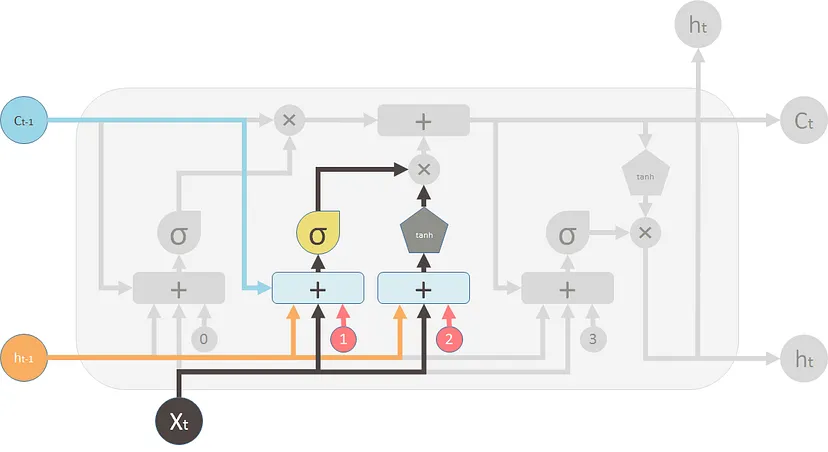

In [ ]:
Image(filename=d+'images/lstm_4.png', height=400, width=600)

Now the second valve is called the new memory valve. Again, it is a one layer simple neural network that takes the same inputs as the forget valve. This valve controls **how much the new memory should influence the old memory.**

The new memory itself, however is generated by another neural network. It is also a one layer network, but uses tanh as the activation function. The output of this network will element-wise multiple the new memory valve, and add to the old memory to form the new memory.

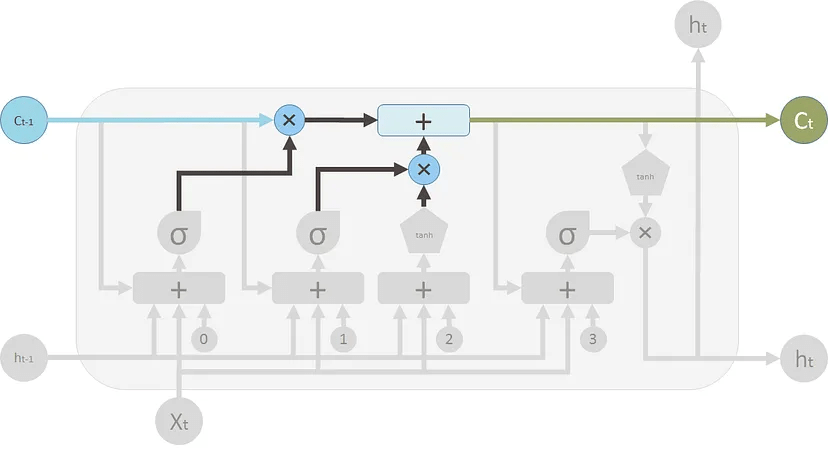

In [ ]:
Image(filename=d+'images/lstm_5.png', height=400, width=600)

These two ✖ signs are the forget valve and the new memory valve.

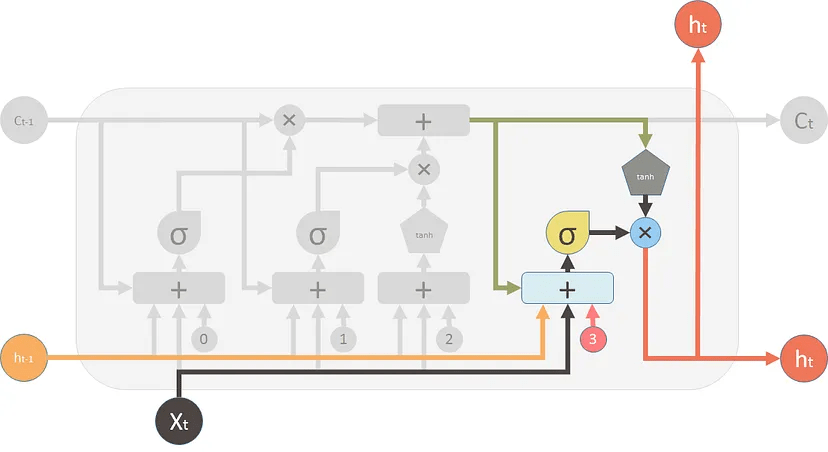

In [ ]:
Image(filename=d+'images/lstm_6.png', height=400, width=600)

And finally, we need to generate the output for this LSTM unit. This step has an output valve that is controlled by the new memory, the previous output $h_{t-1}$, the input $X_t$ and a bias vector. This part controls how much new memory should output to the next LSTM unit.

### Forward and Back Propagation in LSTM with numerical example

source : https://medium.com/@aidangomez/let-s-do-this-f9b699de31d9

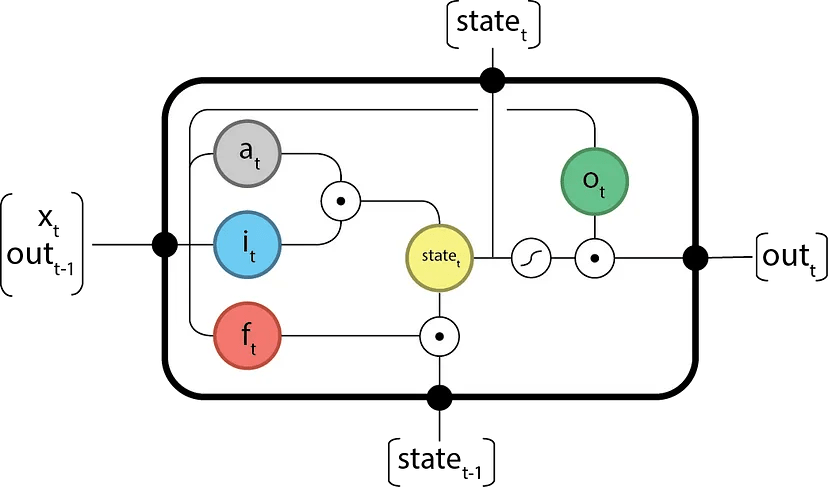

In [ ]:
Image(filename=d+'images/backprop_1.png', height=400, width=600)

#### forward components

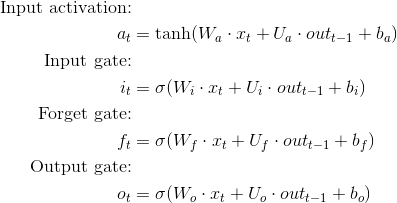

In [ ]:
Image(filename=d+'images/backprop_2.png', height=300, width=600)

Which if we simplify our equations it leads to

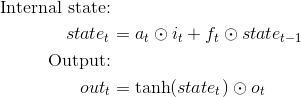

In [ ]:
Image(filename=d+'images/backprop_3.png', height=300, width=600)

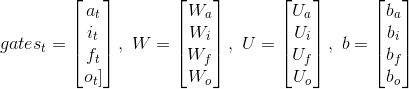

In [ ]:
Image(filename=d+'images/backprop_4.png', height=100, width=600)

#### The backward components

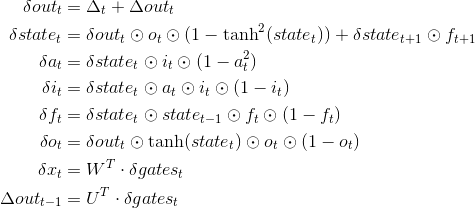

In [ ]:
Image(filename=d+'images/backprop_5.png', height=200, width=600)

### Final updates

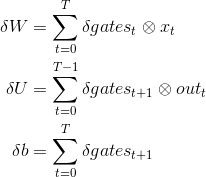

In [ ]:
Image(filename=d+'images/backprop_6.png', height=300, width=400)

### The example

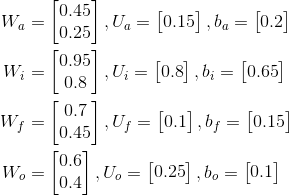

In [ ]:
Image(filename=d+'images/exbackprop_1.png', height=300, width=500)

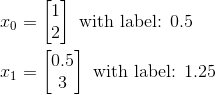

In [ ]:
Image(filename=d+'images/exbackprop_2.png', height=100, width=400)

#### ForwardPropagation in t = 0

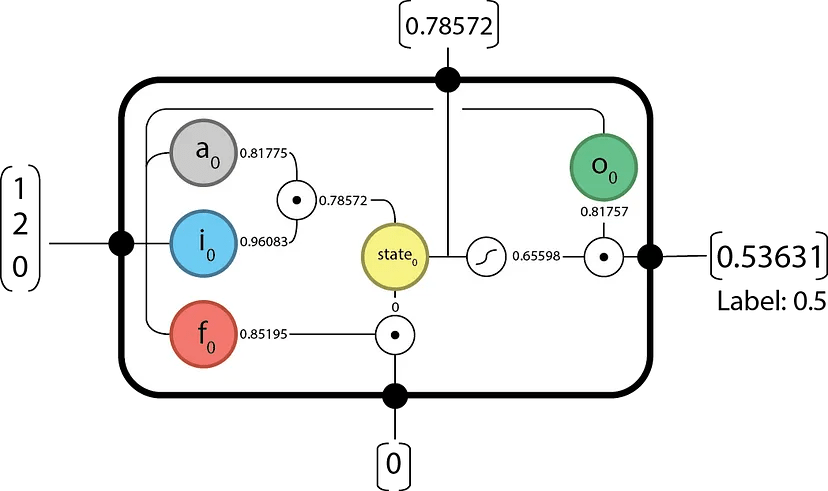

In [ ]:
Image(filename=d+'images/exbackprop_3.png', height=400, width=600)

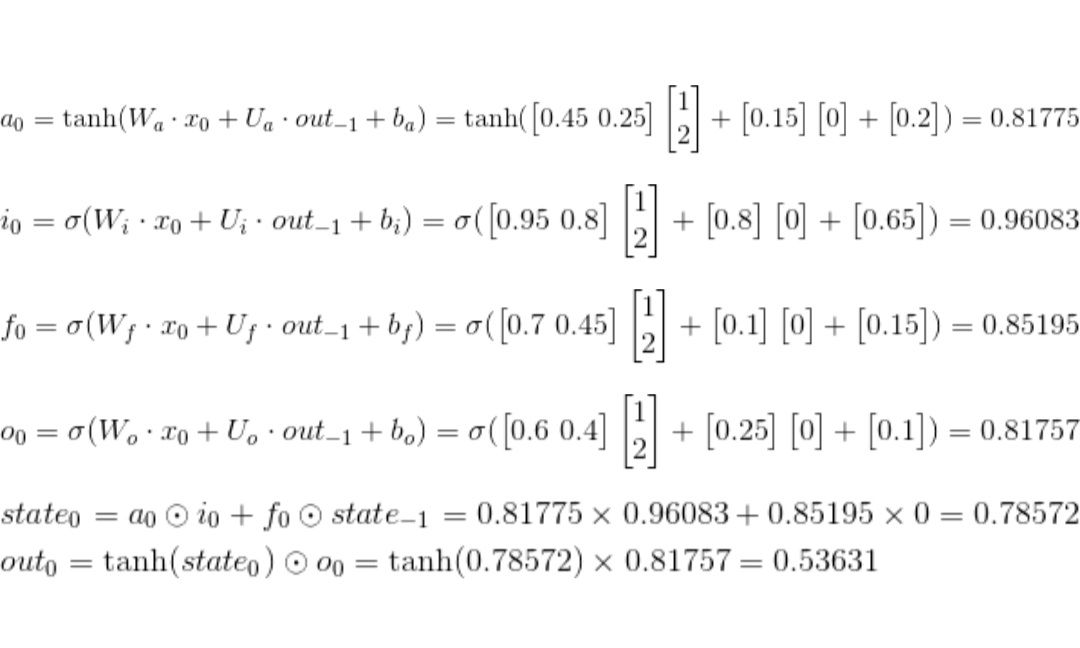

In [5]:
Image(filename=d+'images/Forwardt0.jpg', height=400, width=600)

####Forwart t = 1

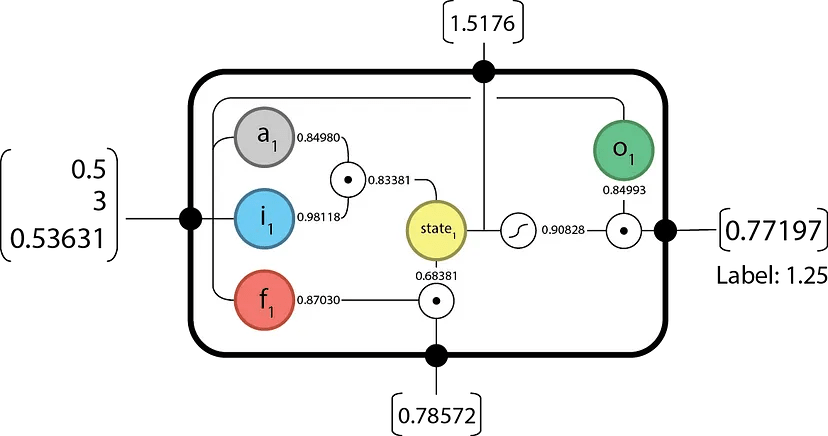

In [ ]:
Image(filename=d+'images/exbackprop_5.png', height=400, width=600)

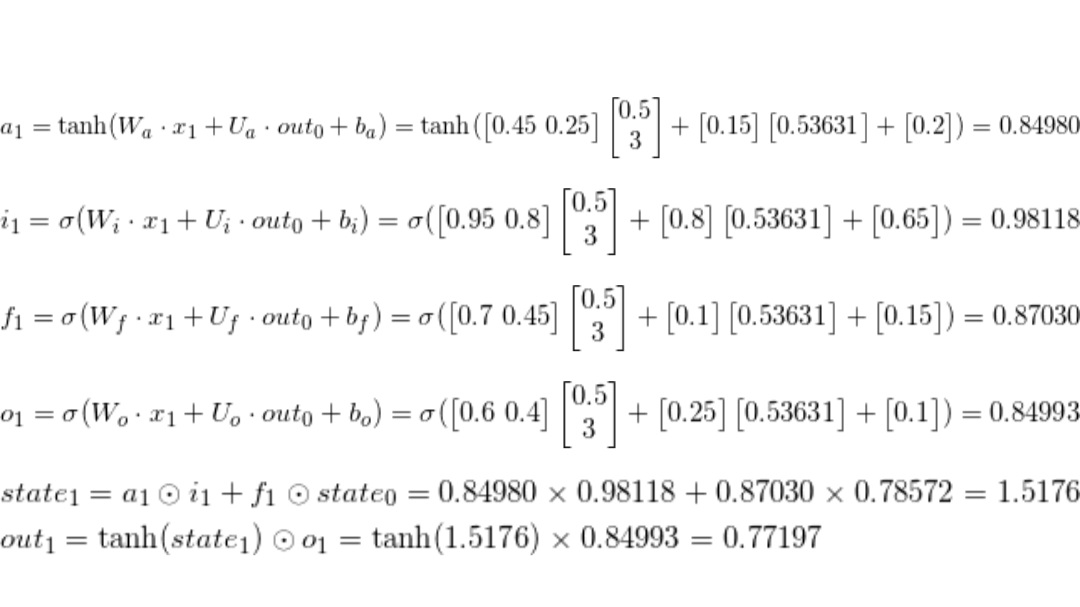

In [6]:
Image(filename=d+'images/Forwardt1.jpg', height=400, width=600)

#### Backward t = 1

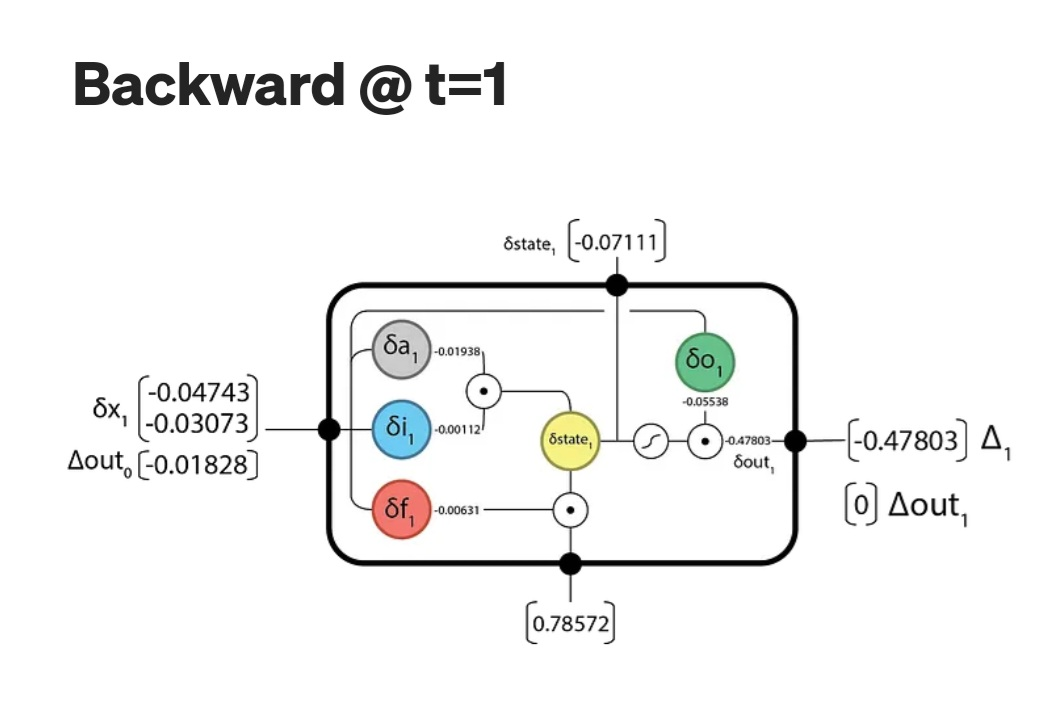

In [8]:
Image(filename=d+'images/Backwardt1.jpg', height=400, width=600)

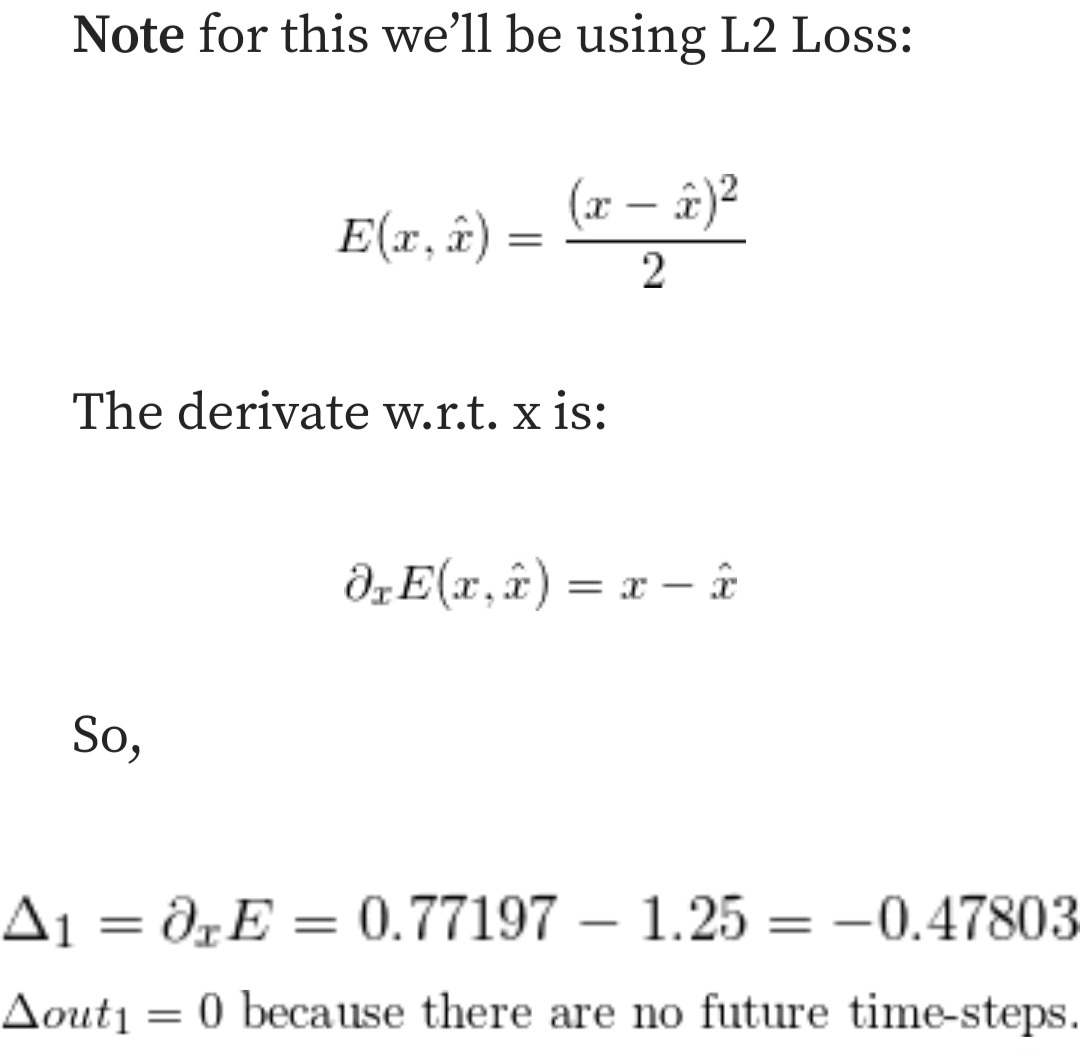

In [9]:
Image(filename=d+'images/lstmloss.jpg', height=400, width=600)

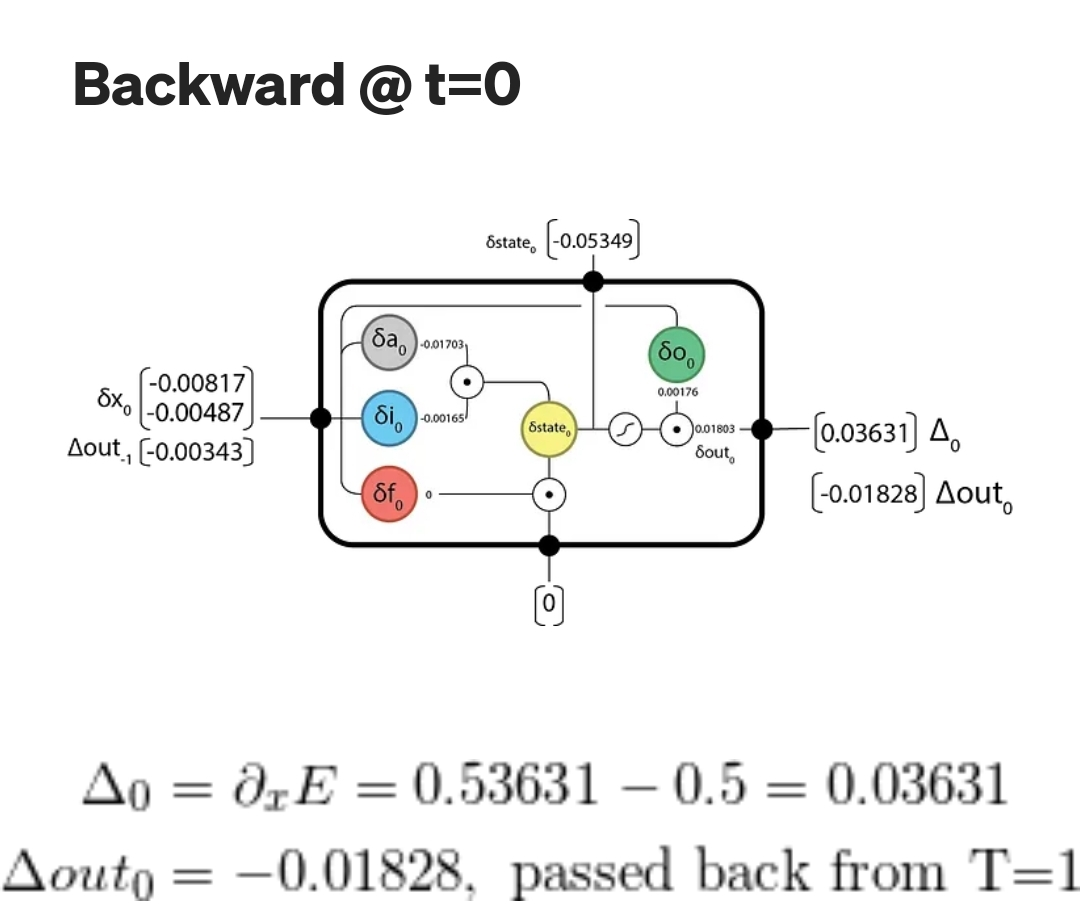

In [11]:
Image(filename=d+r'images/backwardt0.jpg', height=400, width=600)

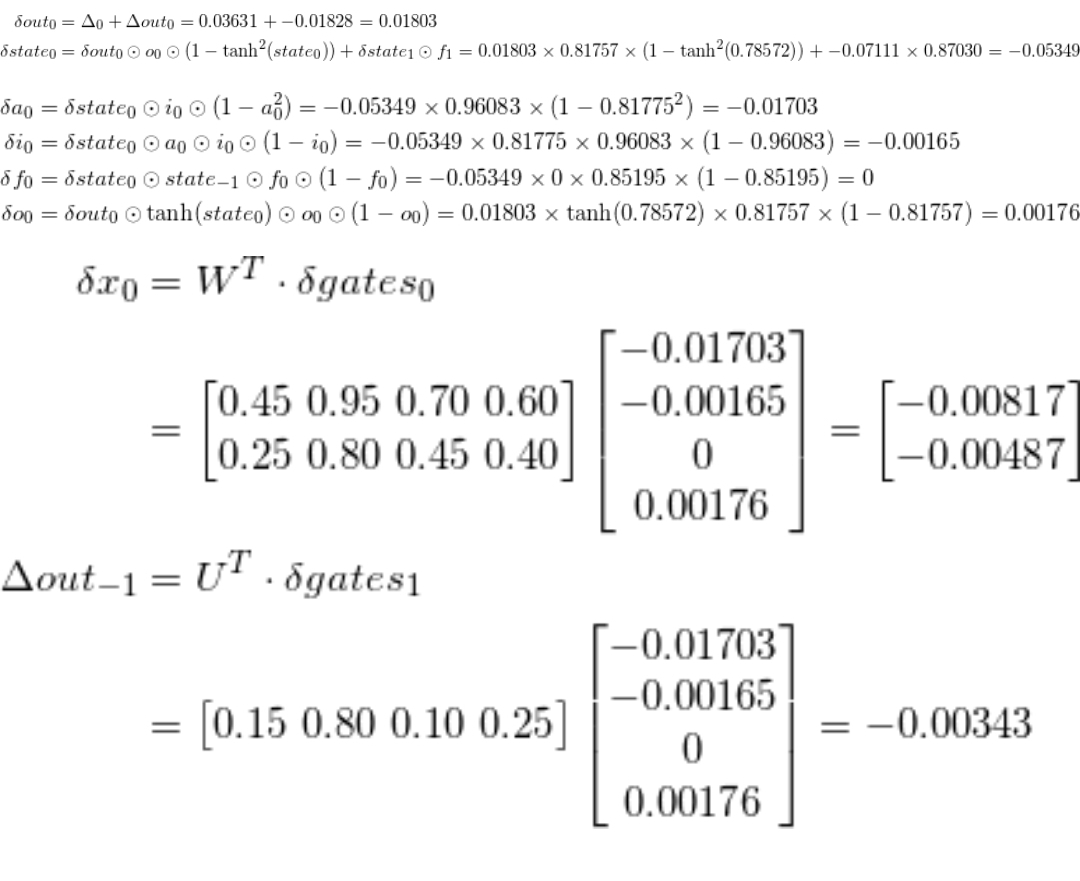

In [12]:
Image(filename=d+r'images/backwardt1cal.jpg', height=400, width=600)

## Part III- Search Algorithms


- **Motivation** : To approximate the shortest path in real-life situations,

### Two examples for A* Search algorithms example

#### First example

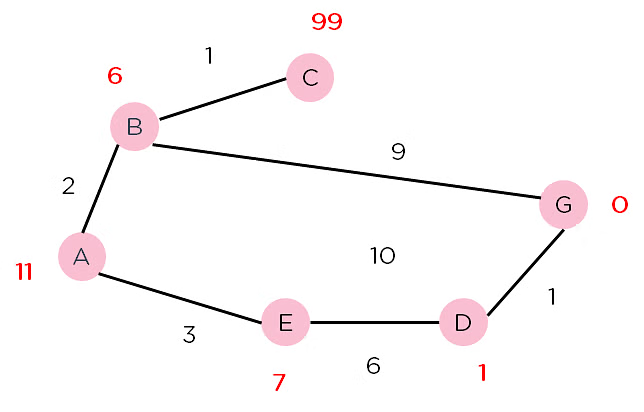

- **Open List:** This is a collection of all the nodes that have been discovered but not yet explored. It’s essentially a priority queue that sorts nodes by their f value, which is the sum of two other parameters: g (the cost to reach the node from the start) and h (the heuristic estimate of the cost to reach the goal from this node). The node with the lowest f value is typically processed next.
- **Closed List:** This list contains all the nodes that have already been explored. When a node is moved from the open list to the closed list, it means that its neighbors have been examined and added to the open list if necessary.

In [ ]:
Graph_nodes = {
    'A': [('B', 2), ('E', 3)],
    'B': [('C', 1), ('G', 9)],
    'C': None,
    'E': [('D', 6)],
    'D': [('G', 1)],
}

In [ ]:
def h(n):
  H = {
    'A': 11,
    'B': 6,
    'C': 9,
    'D': 1,
    'E': 7,
    'G': 0,
  }
  return H[n]

In [ ]:
def get_neighbors(v):
  if v in Graph_nodes:
    return Graph_nodes[v]
  else:
    return None

In [ ]:
def fvalue(s, g):
  result = ''
  for v in s:
    result += "f("+ v+ ")" + " : " + str(h(v)+g[v]) + " "

  return result

In [ ]:
def starSearch(start_node, stop_node):
  open_set = set(start_node)
  closed_set = set()
  g = {}
  parents = {}

  g[start_node] = 0
  parents[start_node] = start_node
  i = 0
  while len(open_set) > 0:
    print("iteration", i)
    print("open set:", fvalue(open_set, g))
    print("closed set:",fvalue(closed_set, g))
    print("")


    n = None
    for v in open_set:
      if n==None or g[v] + h(v) < g[n] + h(n):
        n=v
    if n == stop_node or Graph_nodes[n] == None:
      pass
    else:
      for (m, weight) in get_neighbors(n):
        if m not in open_set and m not in closed_set:
          open_set.add(m)
          parents[m] = n
          g[m] = g[n] + weight

        else:
          if g[m]> g[n]+weight:
            g[m] = g[n] + weight
            parents[m] = n

            if m in closed_set:
              closed_set.remove(m)
              open_set.add(m)

    if n == None:
      print("no path")
      return None

    if n == stop_node:
      path= []
      while parents[n] != n:
        path.append(n)
        n = parents[n]

      path.append(start_node)
      path.reverse()

      return path

    open_set.remove(n)
    closed_set.add(n)
    i+=1


print(starSearch('A', 'G'))

iteration 0
open set: f(A) : 11 
closed set: 

iteration 1
open set: f(B) : 8 f(E) : 10 
closed set: f(A) : 11 

iteration 2
open set: f(E) : 10 f(C) : 12 f(G) : 11 
closed set: f(B) : 8 f(A) : 11 

iteration 3
open set: f(D) : 10 f(C) : 12 f(G) : 11 
closed set: f(B) : 8 f(A) : 11 f(E) : 10 

iteration 4
open set: f(C) : 12 f(G) : 10 
closed set: f(D) : 10 f(B) : 8 f(A) : 11 f(E) : 10 

G
{'A': 'A', 'B': 'A', 'E': 'A', 'C': 'B', 'G': 'D', 'D': 'E'}
['A', 'E', 'D', 'G']


#### Second example example

In [ ]:
import math
import heapq

# Define the Cell class
class Cell:
	def __init__(self):
		self.parent_i = 0 # Parent cell's row index
		self.parent_j = 0 # Parent cell's column index
		self.f = float('inf') # Total cost of the cell (g + h)
		self.g = float('inf') # Cost from start to this cell
		self.h = 0 # Heuristic cost from this cell to destination

# Define the size of the grid
ROW = 3
COL = 3

# Check if a cell is valid (within the grid)
def is_valid(row, col):
	return (row >= 0) and (row < ROW) and (col >= 0) and (col < COL)

# Check if a cell is unblocked
def is_unblocked(grid, row, col):
	return grid[row][col] == 1

# Check if a cell is the destination
def is_destination(row, col, dest):
	return row == dest[0] and col == dest[1]

# Calculate the heuristic value of a cell (Euclidean distance to destination)
def calculate_h_value(row, col, dest):
	return (row - dest[0]) + (col - dest[1])

# Trace the path from source to destination
def trace_path(cell_details, dest):
	print("The Path is ")
	path = []
	row = dest[0]
	col = dest[1]

	while not (cell_details[row][col].parent_i == row and cell_details[row][col].parent_j == col):
		path.append((row, col))
		temp_row = cell_details[row][col].parent_i
		temp_col = cell_details[row][col].parent_j
		row = temp_row
		col = temp_col

	path.append((row, col))
	path.reverse()
	for i in path:
		print("->", i, end=" ")
	print()

# Implement the A* search algorithm
def a_star_search(grid, src, dest):

	# Initialize the closed list (visited cells)
	closed_list = [[False for _ in range(COL)] for _ in range(ROW)]
	# Initialize the details of each cell
	cell_details = [[Cell() for _ in range(COL)] for _ in range(ROW)]

	# Initialize the start cell details
	i = src[0]
	j = src[1]
	cell_details[i][j].f = 0
	cell_details[i][j].g = 0
	cell_details[i][j].h = 0
	cell_details[i][j].parent_i = i
	cell_details[i][j].parent_j = j

	# Initialize the open list (cells to be visited) with the start cell
	open_list = []
	heapq.heappush(open_list, (0.0, i, j))

	# Main loop of A* search algorithm
	while len(open_list) > 0:
		# Pop the cell with the smallest f value from the open list
		p = heapq.heappop(open_list)

		# Mark the cell as visited
		i = p[1]
		j = p[2]
		closed_list[i][j] = True

		# For each direction, check the successors
		directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
		for dir in directions:
			new_i = i + dir[0]
			new_j = j + dir[1]

			# If the successor is valid, unblocked, and not visited
			if is_valid(new_i, new_j) and is_unblocked(grid, new_i, new_j) and not closed_list[new_i][new_j]:
				# If the successor is the destination
				if is_destination(new_i, new_j, dest):
					# Set the parent of the destination cell
					cell_details[new_i][new_j].parent_i = i
					cell_details[new_i][new_j].parent_j = j
					print("The destination cell is found")
					# Trace and print the path from source to destination
					trace_path(cell_details, dest)
					return
				else:
					# Calculate the new f, g, and h values
					g_new = cell_details[i][j].g + 1.0
					h_new = calculate_h_value(new_i, new_j, dest)
					f_new = g_new + h_new

					# If the cell is not in the open list or the new f value is smaller
					if cell_details[new_i][new_j].f == float('inf') or cell_details[new_i][new_j].f > f_new:
						# Add the cell to the open list
						heapq.heappush(open_list, (f_new, new_i, new_j))
						# Update the cell details
						cell_details[new_i][new_j].f = f_new
						cell_details[new_i][new_j].g = g_new
						cell_details[new_i][new_j].h = h_new
						cell_details[new_i][new_j].parent_i = i
						cell_details[new_i][new_j].parent_j = j

	def main():
	grid = [
		[1, 0, 1],
		[1, 0, 1],
		[1, 1, 1]
	]

	src = [2, 0]
	dest = [0, 2]

	a_star_search(grid, src, dest)

if __name__ == "__main__":
	main()


The destination cell is found
The Path is 
-> (2, 0) -> (2, 1) -> (2, 2) -> (1, 2) -> (0, 2) 


### Minmax Algorithm

#### Fisrt example (minmax without pruning)

Imagine we are playing a chess that in eachmove there are only two possible moves.In this game the agent is white and starts the game and its opoonent plays in black. In Minimax the two players are called maximizer and minimizer. The maximizer tries to get the highest score possible while the minimizer tries to do the opposite and get the lowest score possible.
Every board state has a value associated with it. In a given state if the maximizer has upper hand then, the score of the board will tend to be some positive value. If the minimizer has the upper hand in that board state then it will tend to be some negative value. The values of the board are calculated by some heuristics which are unique for every type of game.

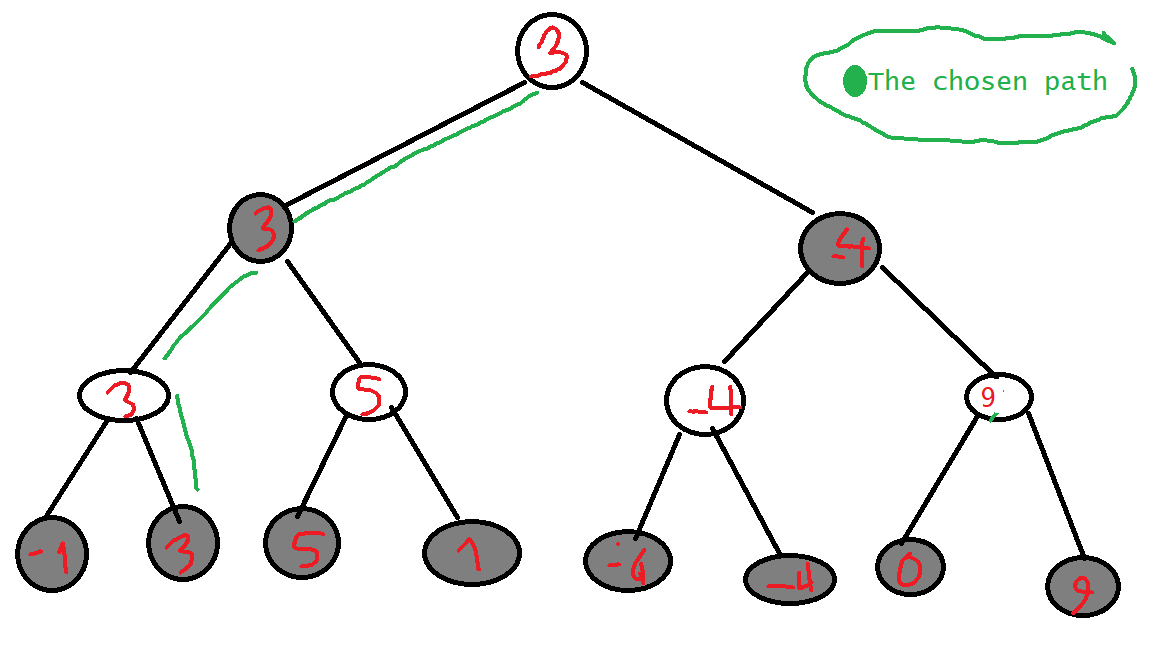

In [ ]:
Image(filename=d+r'images/minmaxsearch_firstexample.png', width = 800, height = 600)

In [ ]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.children = []

def build_tree(depth, evaluations, index=0):
    if depth == 0:
        return Node(evaluations[index])

    node = Node()
    node.children.append(build_tree(depth - 1, evaluations, index * 2))
    node.children.append(build_tree(depth - 1, evaluations, index * 2 + 1))
    return node

def minimax(node, depth, maximizingPlayer):
    if depth == 0 or not node.children:
        return node.value

    if maximizingPlayer:
        maxEval = float('-inf')
        for child in node.children:
            eval = minimax(child, depth - 1, False)
            maxEval = max(maxEval, eval)
        return maxEval
    else:
        minEval = float('inf')
        for child in node.children:
            eval = minimax(child, depth - 1, True)
            minEval = min(minEval, eval)
        return minEval

# Static evaluation values for the leaves
evaluations = [-1 ,3, 5, 1, -6, -4, 0, 9]


root = build_tree(3, evaluations)

# Perform the Minimax search
result = minimax(root, 3, True)
print(f"The optimal value is: {result}")


The optimal value is: 3


#### Second example (using pruning)

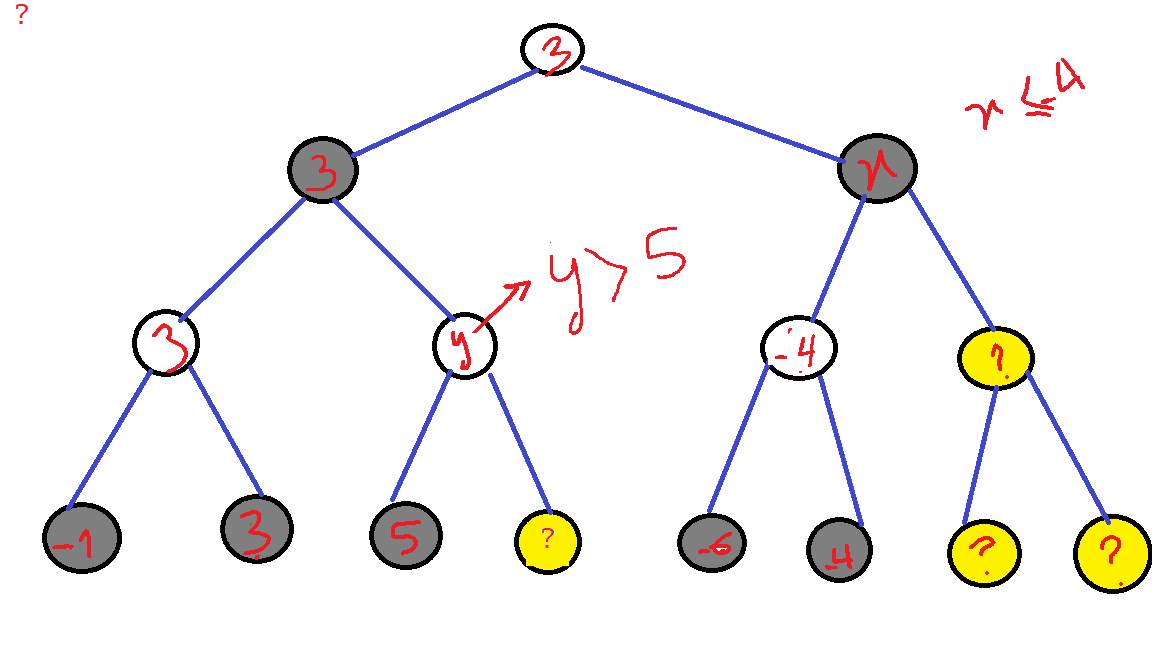

In [ ]:
Image(filename=d+r'images/minmaxsearch_secondexample.png', width = 800, height = 600)

In [ ]:
class Node:
    def __init__(self, value=None):
        self.value = value
        self.children = []

def build_tree(depth, evaluations, index=0):
    if depth == 0:
        return Node(evaluations[index])

    node = Node()
    node.children.append(build_tree(depth - 1, evaluations, index * 2))
    node.children.append(build_tree(depth - 1, evaluations, index * 2 + 1))
    return node

def minimax(node, depth, alpha, beta, maximizingPlayer):
    if depth == 0 or not node.children:
        return node.value

    if maximizingPlayer:
        maxEval = float('-inf')
        for child in node.children:
            eval = minimax(child, depth - 1, alpha, beta, False)
            alpha = max(alpha, eval)
            if(beta <= alpha):
              break
            maxEval = max(maxEval, eval)
        return maxEval
    else:
        minEval = float('inf')
        for child in node.children:
            eval = minimax(child, depth - 1, alpha, beta, True)
            beta = max(beta, eval)
            if(beta <= alpha):
              break
            minEval = min(minEval, eval)
        return minEval

# Static evaluation values for the leaves
evaluations = [-1 ,3, 5, 1, -6, -4, 0, 9]


root = build_tree(3, evaluations)

# Perform the Minimax search
result = minimax(root, 3, float('-inf'), float('inf'),True)
print(f"The optimal value is: {result}")


The optimal value is: 3


### BFS-DFS-UCS examples

This is the tree we are going to use for all the examples.

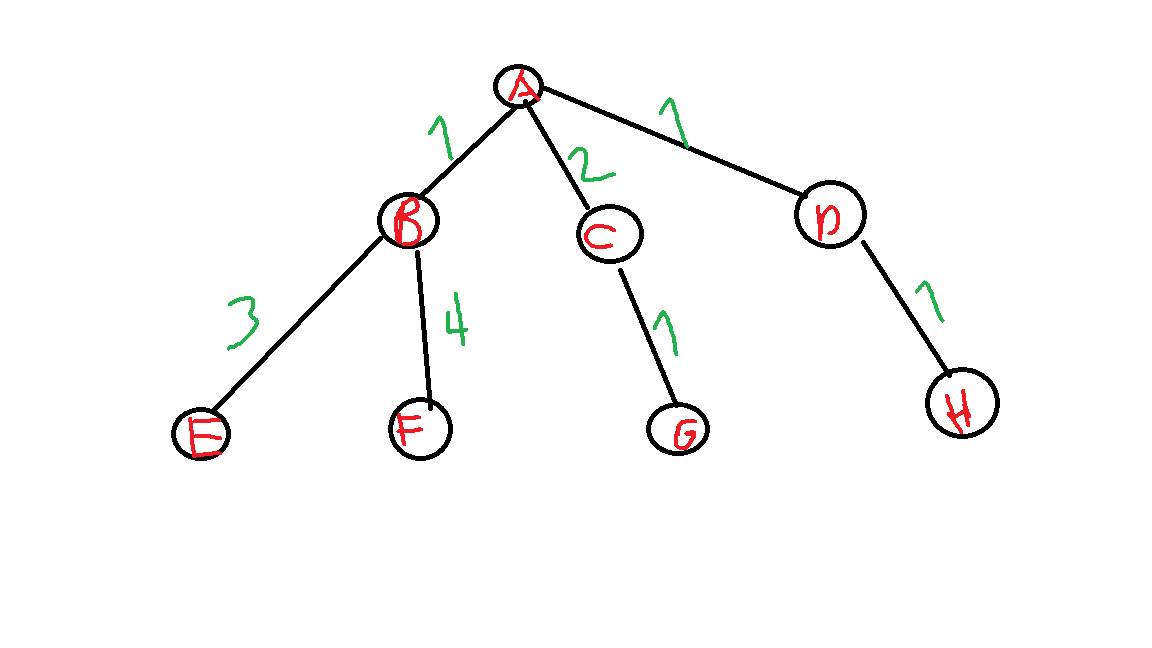

In [ ]:
Image(filename= d+r'images/bfs-dfs-ucs-example.png', width = 800, height = 600)

In [ ]:
graph = {
    'A': ['B', 'C', 'D'],
    'B': ['E', 'F'],
    'C': ['G'],
    'D': ['H'],
    'E': [],
    'F': [],
    'G': [],
    'H': []
}

#### Depth First Search

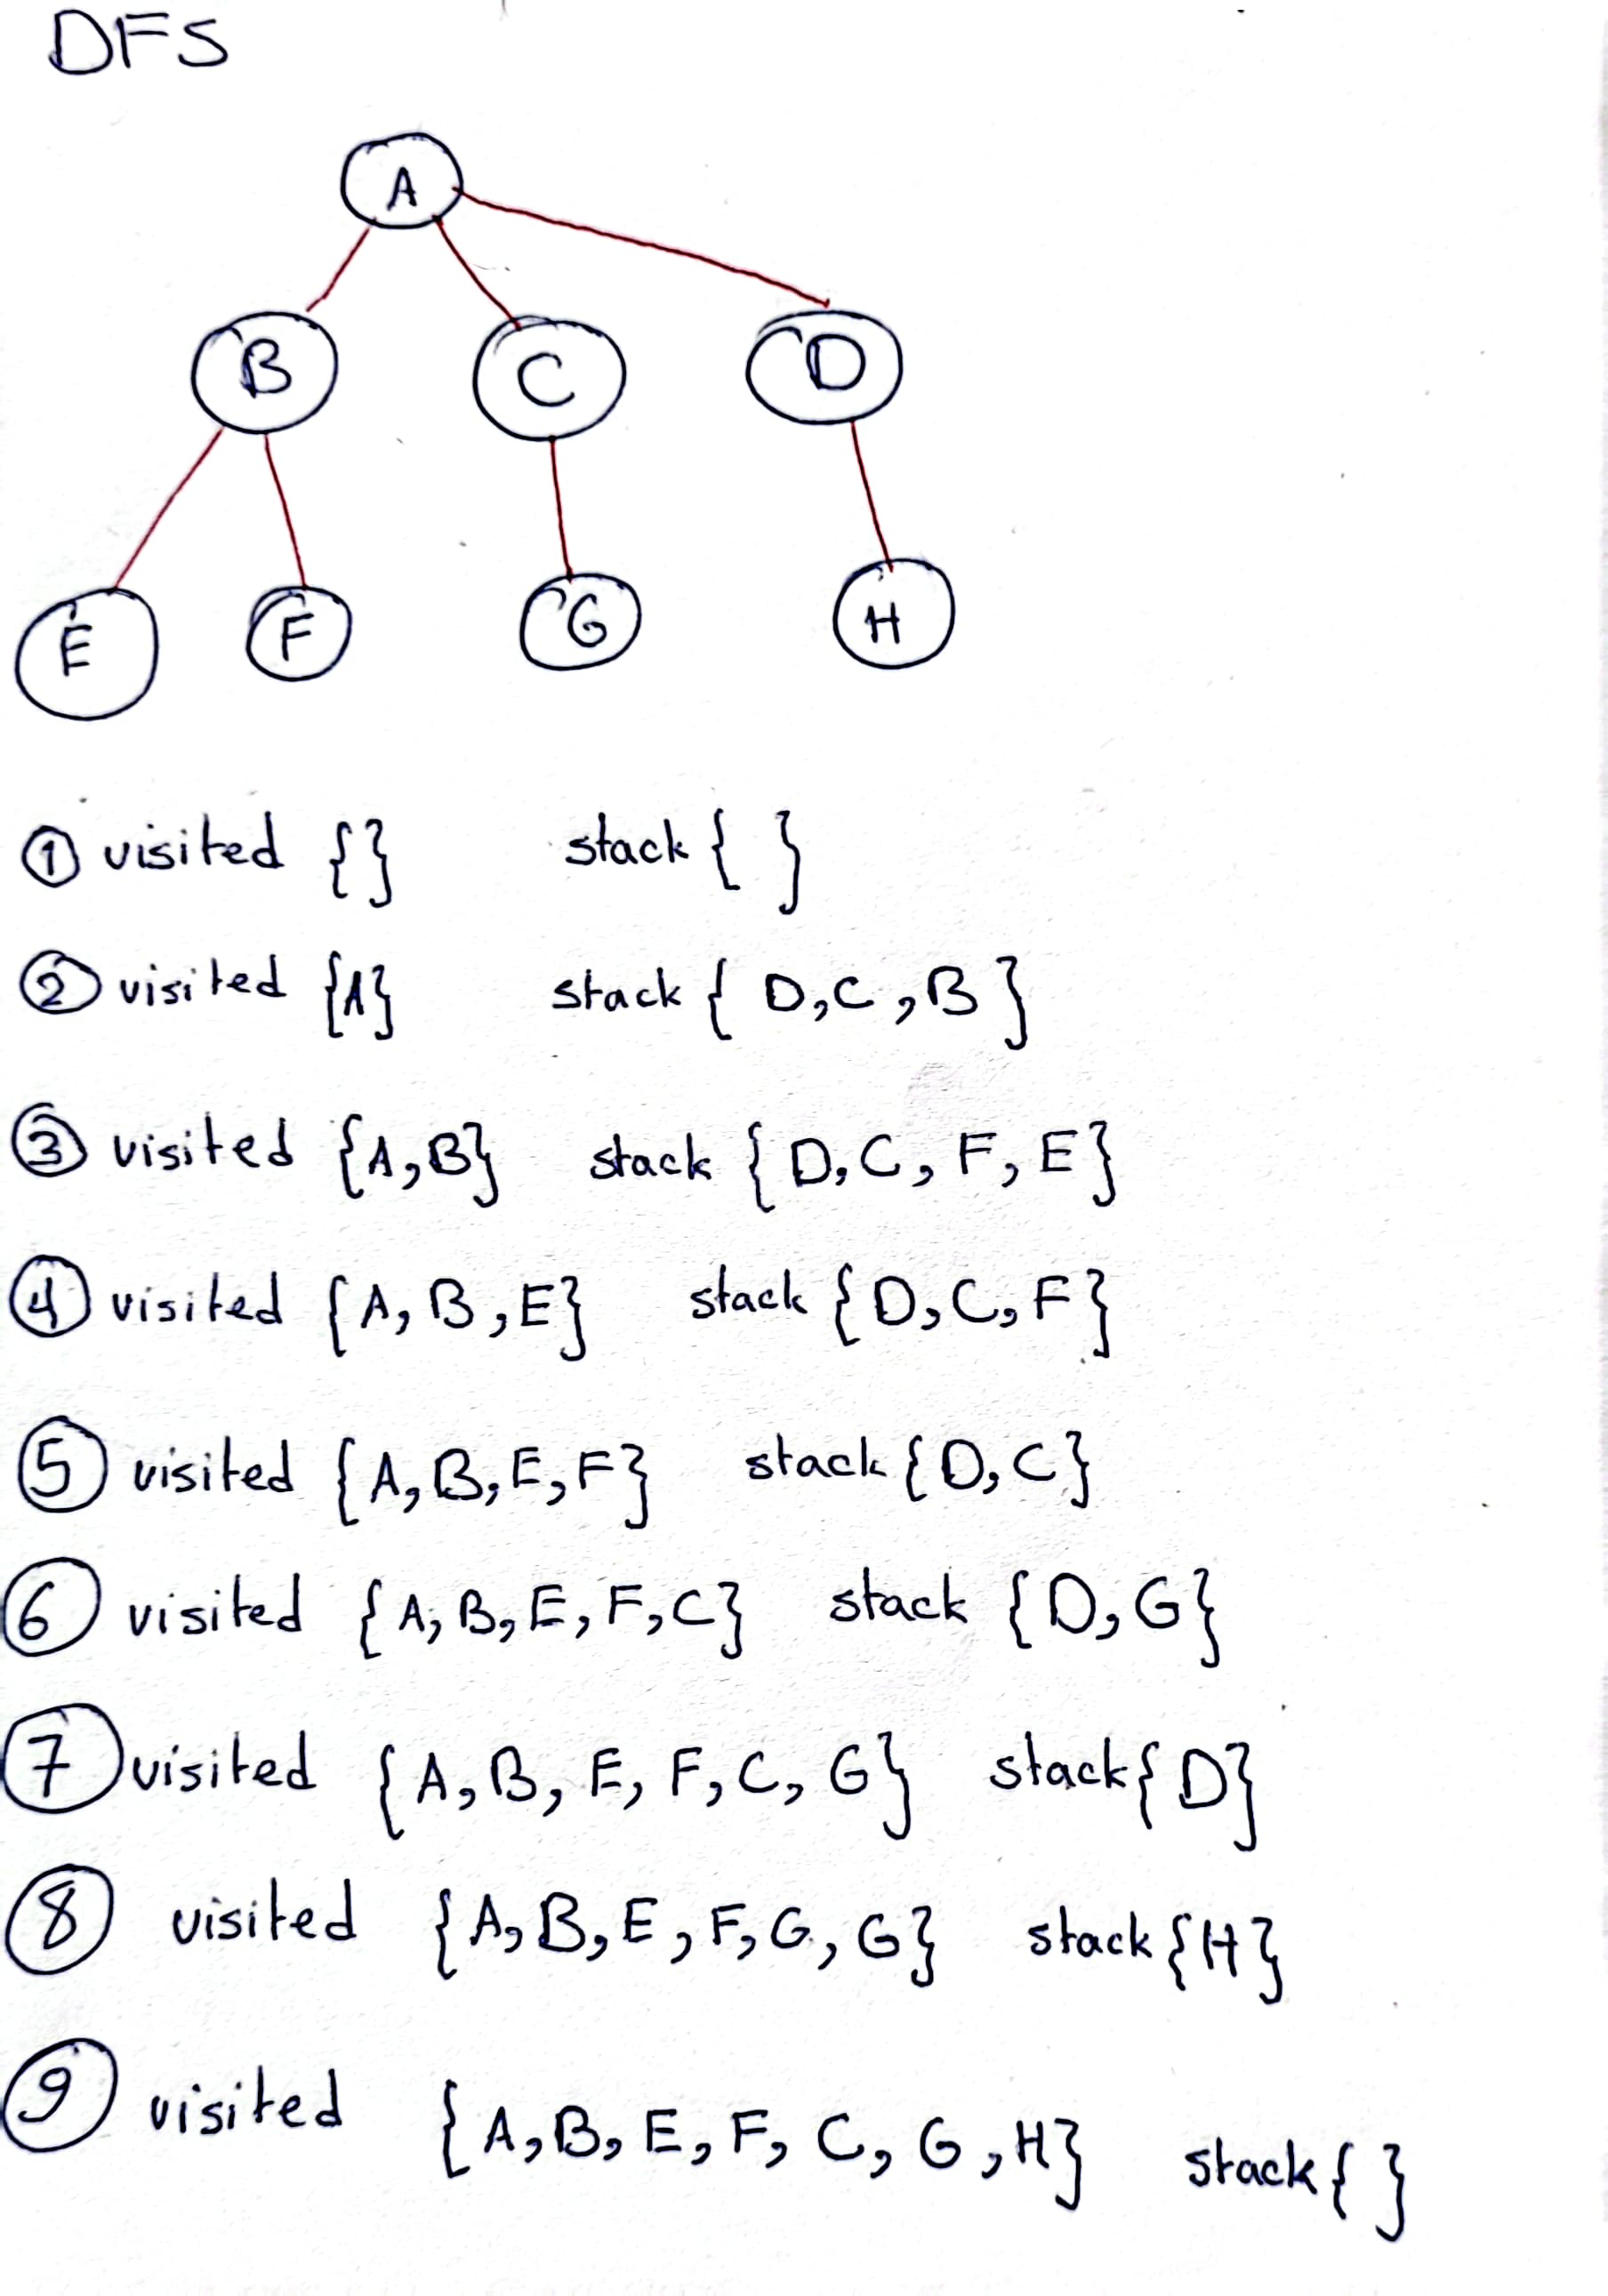

In [ ]:
Image(filename=d+r"images/dfs_example.jpg", width=600, height =1000)

In [ ]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)

    print(start, end=' ')

    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)

print("DFS Traversal: ")
dfs(graph, 'A')

DFS Traversal: 
A B E F C G D H 

#### Breadth First Search (BFS)

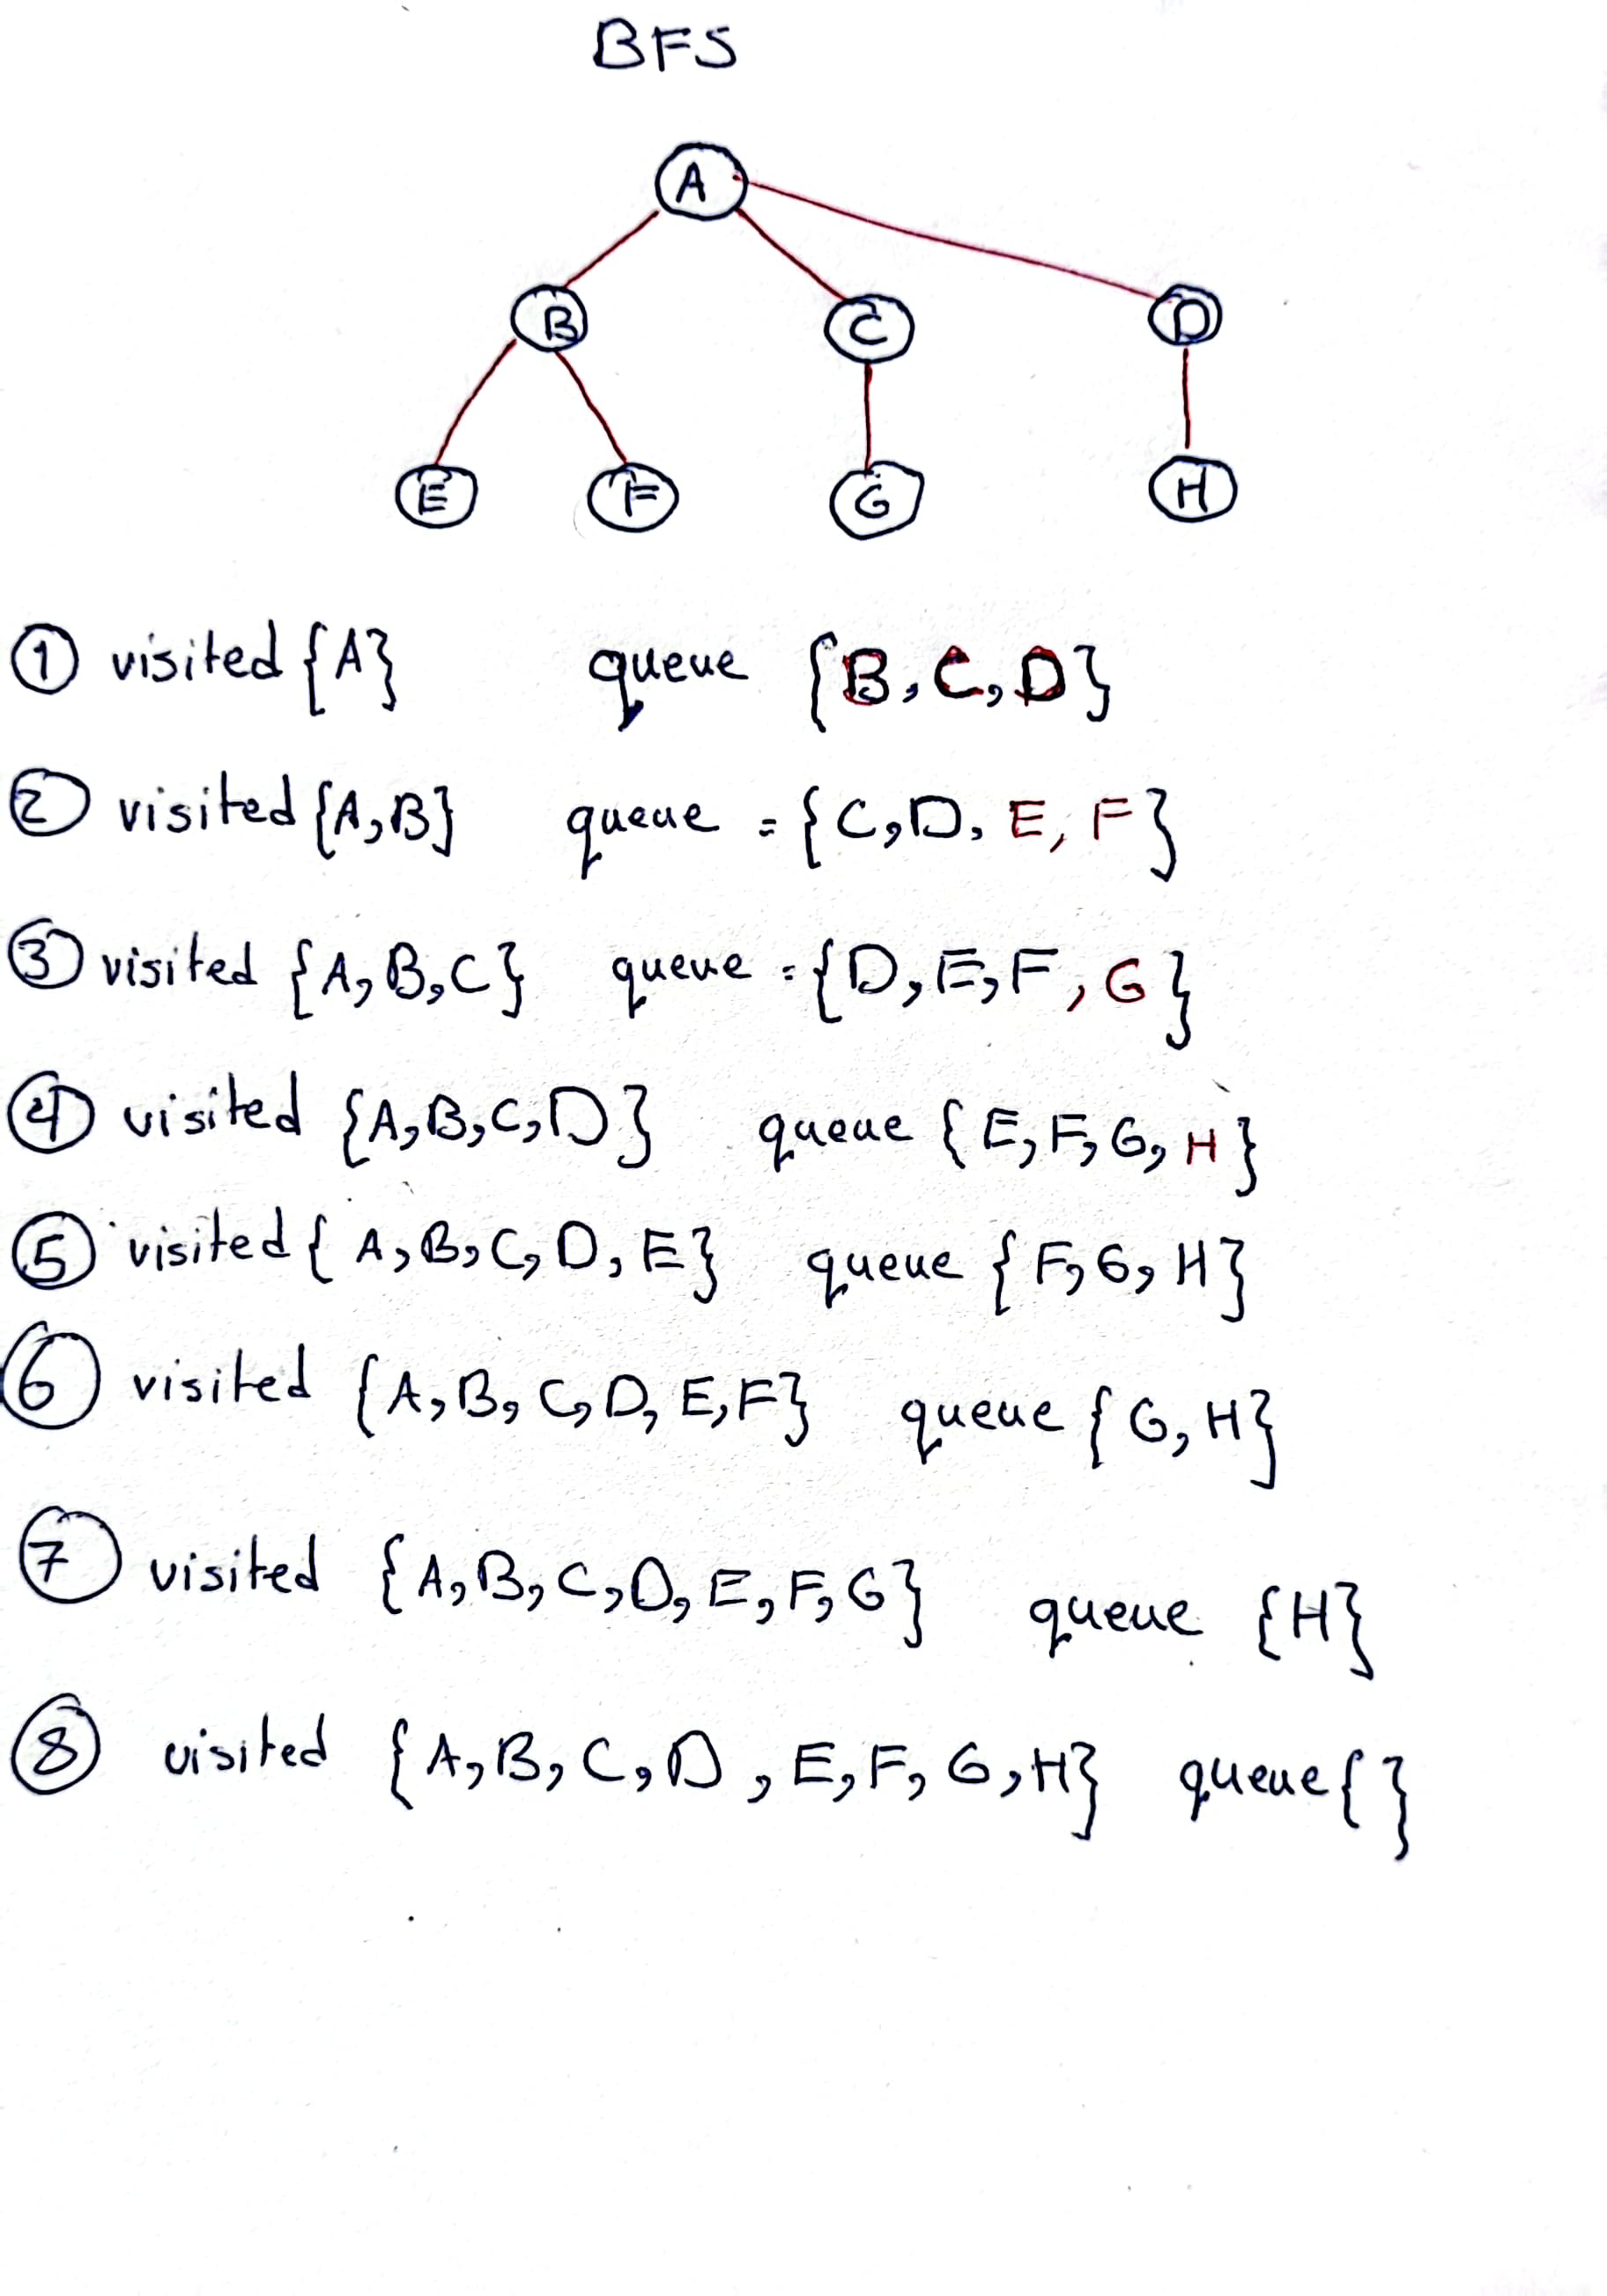

In [ ]:
Image(filename=d+r"images/bfs_example.jpg", width=600, height =1000)

In [ ]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        vertex = queue.popleft()
        if vertex not in visited:
            visited.add(vertex)
            print(vertex, end=' ')
            queue.extend(neighbor for neighbor in graph[vertex] if neighbor not in visited)

print("BFS Traversal: ")
bfs(graph, 'A')

BFS Traversal: 
A B C D E F G H 

###Uniform Cost Search (UCS)

- UCS is an uniformed search algorithm in AL
- UCS algorithm uses the lowest cumulative cost to find a path from the source node to the goal node
- Nodes are expanded, starting from the root, according to the minimum cumulative cost.

Algorithm describtion:
- Insert the root node into the priority queue.
- Remove the element with the highest priority.
- If the remove node is the goal node, then print the cost and stop the algorithm.

- Else enqueue all the children of the current node to the priority queue, with their cumulative cost from the root as priority and the current node to the visited list.

#### UCS Execution from 'A' to 'G'

##### Initialization
- **Priority Queue (PQ)**: `[(0, 'A', [])]`
- **Visited**: `{}`

##### Iteration 1
1. Pop `(0, 'A', [])` from PQ
2. **Current Node**: `'A'`, **Cost**: `0`
3. Add neighbors to PQ:
   - `('B', 1)`: `PQ` = `[(1, 'B', ['A'])]`
   - `('C', 2)`: `PQ` = `[(1, 'B', ['A']), (2, 'C', ['A'])]`
   - `('D', 1)`: `PQ` = `[(1, 'B', ['A']), (2, 'C', ['A']), (1, 'D', ['A'])]`
4. **Visited**: `{'A'}`

##### Iteration 2
1. Pop `(1, 'B', ['A'])` from PQ
2. **Current Node**: `'B'`, **Cost**: `1`
3. Add neighbors to PQ:
   - `('E', 4)`: `PQ` = `[(2, 'C', ['A']), (1, 'D', ['A']), (4, 'E', ['A', 'B'])]`
   - `('F', 5)`: `PQ` = `[(2, 'C', ['A']), (1, 'D', ['A']), (4, 'E', ['A', 'B']), (5, 'F', ['A', 'B'])]`
4. **Visited**: `{'A', 'B'}`

##### Iteration 3
1. Pop `(1, 'D', ['A'])` from PQ
2. **Current Node**: `'D'`, **Cost**: `1`
3. Add neighbor to PQ:
   - `('H', 2)`: `PQ` = `[(2, 'C', ['A']), (4, 'E', ['A', 'B']), (5, 'F', ['A', 'B']), (2, 'H', ['A', 'D'])]`
4. **Visited**: `{'A', 'B', 'D'}`

##### Iteration 4
1. Pop `(2, 'C', ['A'])` from PQ
2. **Current Node**: `'C'`, **Cost**: `2`
3. Add neighbor to PQ:
   - `('G', 3)`: `PQ` = `[(4, 'E', ['A', 'B']), (5, 'F', ['A', 'B']), (2, 'H', ['A', 'D']), (3, 'G', ['A', 'C'])]`
4. **Visited**: `{'A', 'B', 'D', 'C'}`

##### Iteration 5
1. Pop `(2, 'H', ['A', 'D'])` from PQ
2. **Current Node**: `'H'`, **Cost**: `2`
3. **Goal Not Reached**; continue
4. **Visited**: `{'A', 'B', 'D', 'C', 'H'}`

##### Iteration 6
1. Pop `(3, 'G', ['A', 'C'])` from PQ
2. **Current Node**: `'G'`, **Cost**: `3`
3. **Goal Reached**: Path = `['A', 'C', 'G']`, Cost = `3`
4. **Visited**: `{'A', 'B', 'D', 'C', 'H', 'G'}`

##### Summary
- **Path Found**: `['A', 'C', 'G']`
- **Total Cost**: `3`

In [ ]:
import heapq
graph = {
    'A': {'B': 1, 'C': 2, 'D': 1},
    'B': {'E': 3, 'F': 4},
    'C': {'G': 1},
    'D': {'H': 1},
    'E': {},
    'F': {},
    'G': {},
    'H': {}
}

def ucs(graph, start, goal):
    queue = [(0, start, [])]
    visited = set()
    heapq.heapify(queue)

    while queue:
        (cost, vertex, path) = heapq.heappop(queue)
        if vertex not in visited:
            visited.add(vertex)
            path = path + [vertex]
            if vertex == goal:
                return (cost, path)
            for next_vertex, weight in graph[vertex].items():
                if next_vertex not in visited:
                    heapq.heappush(queue, (cost + weight, next_vertex, path))
    return float("inf")

print("UCS from A to G: ")
ucs_cost, ucs_path = ucs(graph, 'A', 'G')
print(f"Cost: {ucs_cost}, Path: {ucs_path}")

UCS from A to G: 
Cost: 3, Path: ['A', 'C', 'G']


####Constraint Satisfaction Problem
To solve the map coloring problem using a constraint satisfaction problem (CSP) approach in Python, we can use the `simpleai` library, which provides tools for defining and solving CSPs. Here's how to approach the problem step by step:

1. **Define the Regions and Neighbors**: Specify the regions and their neighbors based on the map.
2. **Define the Variables and Domains**: Each region is a variable, and the domain for each variable is the set of colors.
3. **Define the Constraints**: Ensure that no two adjacent regions have the same color.
4. **Solve the CSP**: Use the BFS algorithm using a queue to find a solution that satisfies all constraints.

In [ ]:
from collections import deque


def coloring(graph , colors , start):
  visited = set([start])
  Q = deque([start])

  while Q:
        node = Q.popleft()
        print(node, end=" ")
        # adding to Q
        for neighbour in graph[node]['neighbors']:
            if neighbour not in visited:
                visited.add(neighbour)
                Q.append(neighbour)

        # assign colors
        for color in colors:
            canUse = True
            for checker in graph[node]['neighbors']:
              if graph[checker]['color'] == color:
                canUse = False
                break
            if canUse:
              graph[node]['color'] = color
              break
        # check if we have some other parts
  for node in graph:
    if graph[node]['color'] == None:
       coloring(graph , colors , node)


  return visited

graph = {
    'Mark': {'neighbors': ['Julia' , 'Steve' ] , 'color' : None },
    'Steve': {'neighbors': ['Mark' , 'Julia' , 'Amanda' , 'Michelle' , 'Allan'] , 'color':None },
    'Allan': {'neighbors': ['Steve' , 'Michelle'] , 'color':None },
    'Julia': {'neighbors': ['Mark' , 'Steve' , 'Amanda' , 'Derek' , 'Brian'] , 'color':None },
    'Amanda': {'neighbors': ['Steve' , 'Julia' , 'Derek' , 'Michelle'] , 'color':None },
    'Michelle': {'neighbors': ['Allan' , 'Steve' , 'Amanda' , 'Joanne'] , 'color':None },
    'Brian': {'neighbors': ['Julia' , 'Derek' , 'Kelly'] , 'color':None },
    'Derek': {'neighbors': ['Julia' , 'Brian' , 'Kelly' , 'Chris' , 'Joanne' , 'Amanda'] , 'color':None },
    'Joanne': {'neighbors': ['Michelle' , 'Amanda' , 'Derek' , 'Chris'] , 'color':None },
    'Kelly': {'neighbors': ['Brian' , 'Derek' , 'Chris' ] , 'color':None },
    'Chris': {'neighbors': ['Kelly' , 'Joanne' , 'Derek'] , 'color':None }
    }


colors = ['red' , 'blue' , 'green' , 'gray']


visitedNodes = coloring(graph=graph ,colors=colors ,  start='Mark')
print('\nvisited nodes : ' ,  visitedNodes)

for node in graph :
  print(node , ' : ' , graph[node])

Mark Julia Steve Amanda Derek Brian Michelle Allan Kelly Chris Joanne 
visited nodes :  {'Amanda', 'Allan', 'Brian', 'Derek', 'Mark', 'Kelly', 'Michelle', 'Steve', 'Joanne', 'Julia', 'Chris'}
Mark  :  {'neighbors': ['Julia', 'Steve'], 'color': 'red'}
Steve  :  {'neighbors': ['Mark', 'Julia', 'Amanda', 'Michelle', 'Allan'], 'color': 'green'}
Allan  :  {'neighbors': ['Steve', 'Michelle'], 'color': 'red'}
Julia  :  {'neighbors': ['Mark', 'Steve', 'Amanda', 'Derek', 'Brian'], 'color': 'blue'}
Amanda  :  {'neighbors': ['Steve', 'Julia', 'Derek', 'Michelle'], 'color': 'red'}
Michelle  :  {'neighbors': ['Allan', 'Steve', 'Amanda', 'Joanne'], 'color': 'blue'}
Brian  :  {'neighbors': ['Julia', 'Derek', 'Kelly'], 'color': 'red'}
Derek  :  {'neighbors': ['Julia', 'Brian', 'Kelly', 'Chris', 'Joanne', 'Amanda'], 'color': 'green'}
Joanne  :  {'neighbors': ['Michelle', 'Amanda', 'Derek', 'Chris'], 'color': 'gray'}
Kelly  :  {'neighbors': ['Brian', 'Derek', 'Chris'], 'color': 'blue'}
Chris  :  {'neigh